In [1]:
import os
print(os.listdir())

['1_tests.ipynb', 'display_img.py', 'images']


In [4]:
import numpy as np
import cv2

image_color = cv2.imread('images/opencv-logo.png', cv2.IMREAD_COLOR)
image_gray = cv2.imread('images/opencv-logo.png', cv2.IMREAD_GRAYSCALE)


#cv2.namedWindow('OpenCV Logo', cv2.WINDOW_NORMAL)
#cv2.imshow('OpenCV Logo', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

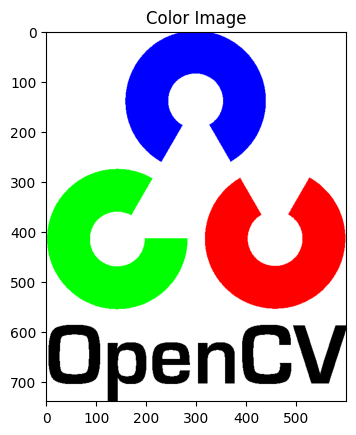

In [5]:
from matplotlib import pyplot as plt

plt.imshow(image_color)
plt.title('Color Image')
plt.show()

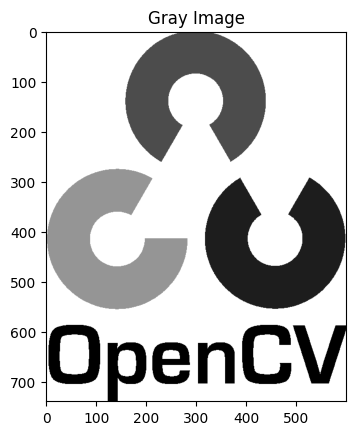

In [33]:
plt.imshow(image_gray, cmap='gray')
plt.title('Gray Image')
plt.show()

In [13]:
cv2.imwrite('images/opencv-logo-color.png', image_color)
cv2.imwrite('images/opencv-logo-gray.png', image_gray)

True

In [15]:
print(type(image_color), type(image_gray))
image_color.shape, image_gray.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


((739, 600, 3), (739, 600))

In [16]:
image_color[0][0]

array([255, 255, 255], dtype=uint8)

In [21]:
image_color.dtype, image_gray.dtype

(dtype('uint8'), dtype('uint8'))

In [20]:
image_color.size, image_gray.size

(1330200, 443400)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [65535..65535].


[0]
[1 1 1]
[65535 65535 65535]
[255   0   0]


<Figure size 640x480 with 0 Axes>

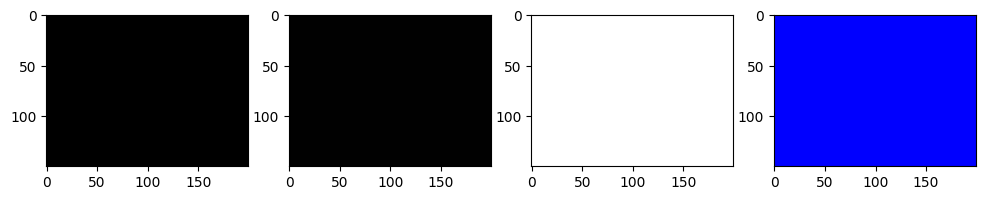

In [7]:
plt.figure()

f, axarr = plt.subplots(1,4, figsize=(12, 3)) 

black = np.zeros([150,200,1],'uint8')
#cv2.imshow("Black",black)
axarr[0].imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB))

print(black[0,0,:])

ones = np.ones([150,200,3],'uint8')
#cv2.imshow("Ones",ones)
axarr[1].imshow(cv2.cvtColor(ones, cv2.COLOR_BGR2RGB))
print(ones[0,0,:])

white = np.ones([150,200,3],'uint16')
white *= (2**16-1)
#cv2.imshow("White",white)
axarr[2].imshow(cv2.cvtColor(white, cv2.COLOR_BGR2RGB))
print(white[0,0,:])

color = ones.copy()
color[:,:] = (255,0,0)
#cv2.imshow("Blue",color)
axarr[3].imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
print(color[0,0,:])

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.show()

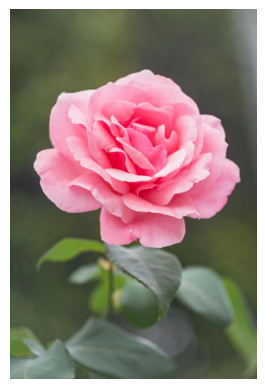

In [5]:
rose_img = cv2.imread("images/rose.jpg", 1)
rgb_img = cv2.cvtColor(rose_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.axis('off')  # Hide x and y axis
plt.show()

In [6]:
rose_img.shape

(2829, 1886, 3)

In [1]:
import numpy as np
import cv2

color = cv2.imread("images/rose_smaller.jpg", 1)
cv2.imshow("Image",color)
cv2.moveWindow("Image",0,0)
print(color.shape)
height,width,channels = color.shape

b,g,r = cv2.split(color)

rgb_split = np.empty([height,width*3,3],'uint8')

rgb_split[:, 0:width] = cv2.merge([b,b,b])
rgb_split[:, width:width*2] = cv2.merge([g,g,g])
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])

cv2.imshow("Channels",rgb_split)
cv2.moveWindow("Channels",0,height)

hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v),axis=1)
cv2.imshow("Split HSV",hsv_split)

cv2.waitKey(0)
cv2.destroyAllWindows()

(900, 640, 3)


<Figure size 640x480 with 0 Axes>

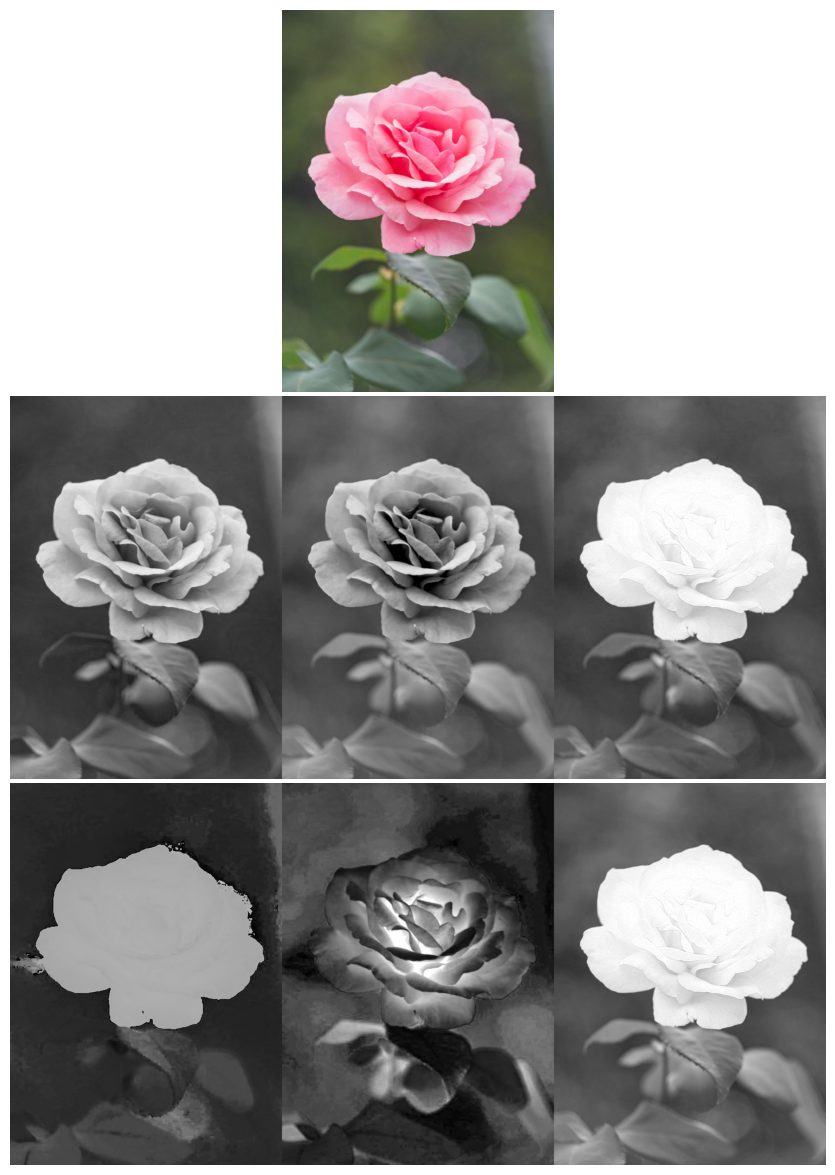

In [22]:
from matplotlib import pyplot as plt

plt.figure()

f, axarr = plt.subplots(3,1, figsize=(15, 15)) 

axarr[0].imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
axarr[0].axis('off')
axarr[1].imshow(cv2.cvtColor(rgb_split, cv2.COLOR_BGR2RGB))
axarr[1].axis('off')
axarr[2].imshow(cv2.cvtColor(hsv_split, cv2.COLOR_BGR2RGB))
axarr[2].axis('off')

plt.subplots_adjust(hspace=0.01)

plt.show()

In [1]:
import numpy as np
import cv2

color = cv2.imread("images/butterfly.jpg",1)

gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
#cv2.imwrite("images/gray.jpg",gray)

b = color[:,:,0]
g = color[:,:,1]
r = color[:,:,2]

rgba = cv2.merge((b,g,r,g))
cv2.imwrite("images/butterfly_rgba.png",rgba)


True

In [9]:
def plot(images, titles):
    if len(images) != len(titles):
        raise ValueError("The number of images and titles must be the same.")
    
    cols = len(images)
    fig, axarr = plt.subplots(1, cols, figsize=(5 * cols, 5))

    for i in range(cols):
        ax = axarr[i] if cols > 1 else axarr
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


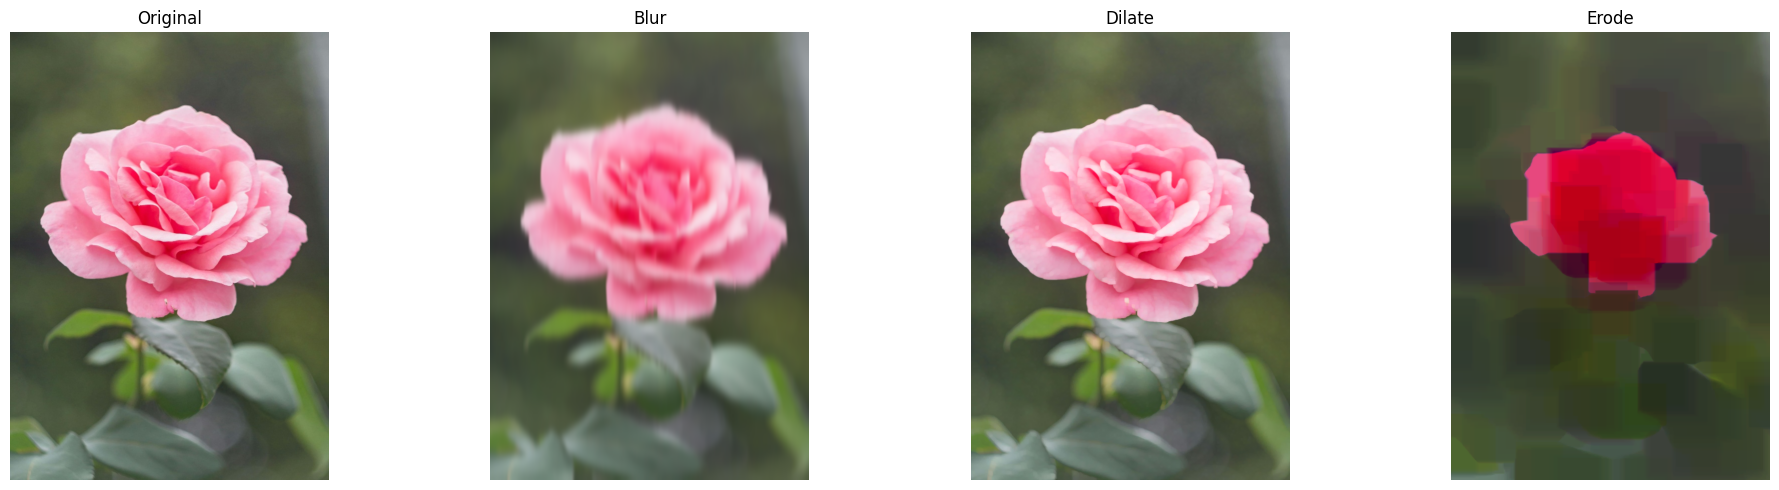

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = "images/rose_smaller.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image loaded properly
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
    exit()

# Apply image processing operations
blur = cv2.GaussianBlur(image, (5, 55), 0)
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(image, kernel, iterations=1)
erode = cv2.erode(image, kernel, iterations=20)

plot([image, blur, dilate, erode],
     ["Original", "Blur", "Dilate", "Erode"])


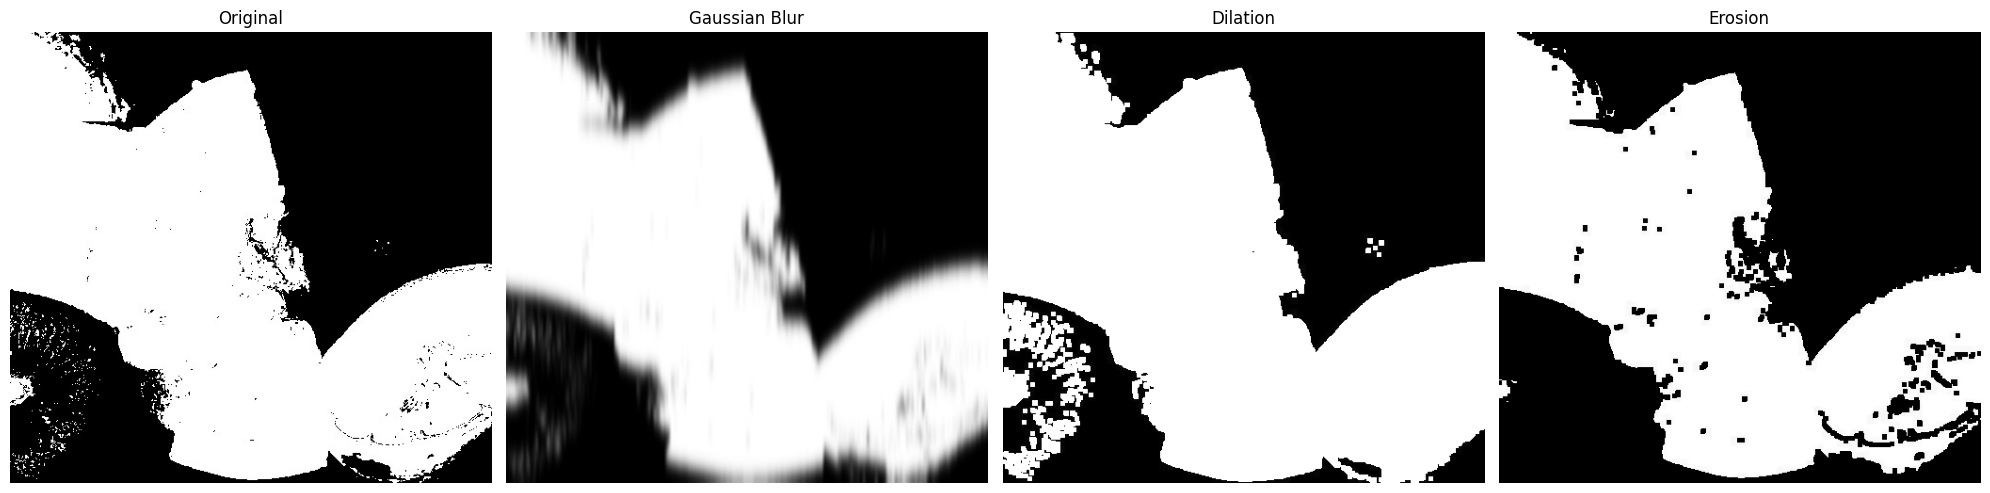

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = "images/thresh.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image loaded properly
if image is None:
    print(f"Error: Could not load image at '{image_path}'")
    exit()

# Apply image processing operations
blur = cv2.GaussianBlur(image, (5, 55), 0)
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(image, kernel, iterations=1)
erode = cv2.erode(image, kernel, iterations=1)

# Plot using matplotlib
fig, axarr = plt.subplots(1, 4, figsize=(20, 5))

images = [image, blur, dilate, erode]
titles = ["Original", "Gaussian Blur", "Dilation", "Erosion"]

for i in range(4):
    axarr[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axarr[i].set_title(titles[i])
    axarr[i].axis('off')

plt.tight_layout()
plt.show()
